In [1]:
import tensorflow as tf


In [2]:
#import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#import the dataset from kaggle to google colab
#install kaggle API
! pip install -q kaggle

In [4]:
#create a director as kaggle
! mkdir -p ~/.kaggle

In [8]:
#import kaggle API
from google.colab import files
upload = files.upload()

Saving kaggle.json to kaggle.json


In [9]:
#copy API key to kaggle directory
! cp kaggle.json ~/.kaggle/

In [10]:
#disable API key
! chmod 600 /root/.kaggle/kaggle.json

In [11]:
#list of data sets download from kaggle.com
! kaggle datasets list


ref                                                                 title                                                size  lastUpdated          downloadCount  
------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
imoore/60k-stack-overflow-questions-with-quality-rate               60k Stack Overflow Questions with Quality Rating     21MB  2020-09-06 23:43:03            288  
anikannal/solar-power-generation-data                               Solar Power Generation Data                           2MB  2020-08-18 15:52:03           1922  
ihelon/lego-minifigures-classification                              LEGO Minifigures Classification                      10MB  2020-09-06 16:42:41            362  
ruchi798/bookcrossing-dataset                                       Book-Crossing: User review ratings                   25MB  2020-08-11 10:40:25            458  
nehaprabhavalkar

In [12]:
#import the data set
! kaggle competitions download -c santander-customer-satisfaction

train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
! unzip /content/train.csv.zip

Archive:  /content/train.csv.zip
  inflating: train.csv               


In [13]:
dataset = pd.read_csv('/content/train.csv')

In [14]:
dataset.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [15]:
dataset.shape

(76020, 371)

In [16]:
x = dataset.drop(labels=['ID','TARGET'], axis=1)
y = dataset['TARGET']

In [17]:
x.shape, y.shape

((76020, 369), (76020,))

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train , x_test , y_train, y_test = train_test_split(x,y, test_size= 0.20, random_state=0)

In [20]:
x_train.shape, x_test.shape , y_train.shape , y_test.shape

((60816, 369), (15204, 369), (60816,), (15204,))

In [21]:
from sklearn.feature_selection import VarianceThreshold

In [22]:
rm_f = VarianceThreshold(threshold=0.01)
x_train = rm_f.fit_transform(x_train)
x_test = rm_f.transform(x_test)

In [23]:
x_train.shape , x_test.shape

((60816, 266), (15204, 266))

In [24]:
369-266

103

In [25]:
x_test.shape

(15204, 266)

In [26]:
#remove duplicate features
x_train_t = x_train.T
x_test_t = x_test.T

In [27]:
x_train_t = pd.DataFrame(x_train_t)
x_test_t = pd.DataFrame(x_test_t)

In [28]:
x_train_t.shape , x_test_t.shape

((266, 60816), (266, 15204))

In [29]:
y_train.shape

(60816,)

In [30]:
#number of duplicate features
x_train_t.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
261    False
262    False
263    False
264    False
265    False
Length: 266, dtype: bool

In [31]:
x_train_t.duplicated().sum()

16

In [32]:
#remove duplicated features (16 of them)
duplicated_features = x_train_t.duplicated()

In [33]:
print(duplicated_features)

0      False
1      False
2      False
3      False
4      False
       ...  
261    False
262    False
263    False
264    False
265    False
Length: 266, dtype: bool


In [34]:
features_to_keep = [not index for index in duplicated_features]
print(features_to_keep)

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, 

In [35]:
x_train = x_train_t[features_to_keep].T
x_test = x_test_t[features_to_keep].T

In [36]:
x_train.shape, x_test.shape

((60816, 250), (15204, 250))

In [37]:
#feature scaling
from sklearn.preprocessing import StandardScaler

In [38]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [39]:
x_train

array([[ 0.03826438, -0.78928712, -0.05257837, ..., -0.01895685,
        -0.01990642,  0.07271318],
       [ 0.03826438, -0.63569505, -0.05257837, ..., -0.01895685,
        -0.01990642,  0.73001879],
       [ 0.03826438,  0.51624549, -0.05257837, ..., -0.01895685,
        -0.01990642, -0.0591358 ],
       ...,
       [ 0.0384475 , -0.78928712, -0.05257837, ..., -0.01895685,
        -0.01990642, -0.27045009],
       [ 0.03826438, -0.25171487, -0.01644412, ..., -0.01895685,
        -0.01990642, -0.28583665],
       [ 0.03826438,  1.66818604, -0.05257837, ..., -0.01895685,
        -0.01990642, -0.23183104]])

In [40]:
x_test

array([[ 3.82643815e-02, -7.89287122e-01, -5.25783749e-02, ...,
        -1.89568530e-02, -1.99064177e-02, -1.25860970e-01],
       [ 3.82643815e-02, -7.89287122e-01, -5.25783749e-02, ...,
        -1.89568530e-02, -1.99064177e-02,  1.50321513e-02],
       [ 3.82643815e-02,  8.23429638e-01, -5.25783749e-02, ...,
        -1.89568530e-02, -1.99064177e-02,  6.91637342e-04],
       ...,
       [ 3.82643815e-02, -9.81227965e-02,  1.30245632e+00, ...,
        -1.89568530e-02, -1.99064177e-02, -5.18940462e-01],
       [ 3.82643815e-02,  2.85857384e-01, -5.25783749e-02, ...,
        -1.89568530e-02, -1.99064177e-02,  6.91637342e-04],
       [ 3.82643815e-02, -6.35695050e-01, -5.25783749e-02, ...,
        -1.89568530e-02, -1.99064177e-02,  2.09550991e-01]])

In [41]:
x_train.shape , x_test.shape

((60816, 250), (15204, 250))

In [42]:
#reshape to a two dimension
x_train = x_train.reshape(60816, 250,1)
x_test = x_test.reshape(15204, 250,1)

In [43]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [44]:
#build the model
model = tf.keras.models.Sequential()

In [45]:
#first CNN layer FIRST
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(250,1)))
#batch normalization FIRST
model.add(tf.keras.layers.BatchNormalization())
#maxpool layer FIRST
model.add(tf.keras.layers.MaxPool1D(pool_size=(2)))
#dropout layer FIRST
model.add(tf.keras.layers.Dropout(0.3))


In [46]:
#second CNN layer SECOND
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
#batch normalization SECOND
model.add(tf.keras.layers.BatchNormalization())
#maxpool layer SECOND
model.add(tf.keras.layers.MaxPool1D(pool_size=(2)))
#dropout layer SECOND
model.add(tf.keras.layers.Dropout(0.5))

In [47]:
#Third CNN layer third
model.add(tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'))
#batch normalization third
model.add(tf.keras.layers.BatchNormalization())
#maxpool layer third
model.add(tf.keras.layers.MaxPool1D(pool_size=(2)))
#dropout layer third
model.add(tf.keras.layers.Dropout(0.5))

In [48]:
#flatten the layers
model.add(tf.keras.layers.Flatten())

In [49]:
#fully connected layers FIRST DENSE LAYER
model.add(tf.keras.layers.Dense(units=256, activation='relu'))
#drop out layer in first dense
model.add(tf.keras.layers.Dropout(0.5))


In [50]:
#output player
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 248, 32)           128       
_________________________________________________________________
batch_normalization (BatchNo (None, 248, 32)           128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 124, 32)           0         
_________________________________________________________________
dropout (Dropout)            (None, 124, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 122, 64)           6208      
_________________________________________________________________
batch_normalization_1 (Batch (None, 122, 64)           256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 61, 64)            0

In [54]:
#compile model
opt = tf.keras.optimizers.Adam(learning_rate=0.00005)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [82]:
#training the model
trained_model = model.fit(x_train, y_train, epochs=10, validation_data= (x_test, y_test))

Epoch 1/10
1901/1901 [==============================] - 89s 47ms/step - loss: 0.1503 - accuracy: 0.9610 - val_loss: 0.1676 - val_accuracy: 0.9578
Epoch 2/10
1901/1901 [==============================] - 86s 45ms/step - loss: 0.1496 - accuracy: 0.9609 - val_loss: 0.1700 - val_accuracy: 0.9576
Epoch 3/10
1901/1901 [==============================] - 85s 45ms/step - loss: 0.1492 - accuracy: 0.9609 - val_loss: 0.1698 - val_accuracy: 0.9581
Epoch 4/10
1901/1901 [==============================] - 88s 46ms/step - loss: 0.1487 - accuracy: 0.9609 - val_loss: 0.1661 - val_accuracy: 0.9579
Epoch 5/10
1901/1901 [==============================] - 87s 46ms/step - loss: 0.1474 - accuracy: 0.9610 - val_loss: 0.1644 - val_accuracy: 0.9580
Epoch 6/10
1901/1901 [==============================] - 87s 46ms/step - loss: 0.1484 - accuracy: 0.9609 - val_loss: 0.1630 - val_accuracy: 0.9580
Epoch 7/10
1901/1901 [==============================] - 86s 45ms/step - loss: 0.1474 - accuracy: 0.9610 - val_loss: 0.1639 -

In [83]:
#make predictions
y_pred = model.predict_classes(x_test)

In [84]:
print(int(y_pred[0]), y_test[0])

0 0


In [85]:
#confusion matrix and accuracy matrix
from sklearn.metrics import confusion_matrix, accuracy_score

In [86]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[14566     4]
 [  634     0]]


In [87]:
acc_m = accuracy_score(y_test, y_pred)
print(acc_m)

0.9580373585898447


In [90]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, trained_model.history['accuracy'])
  plt.plot(epoch_range, trained_model.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, trained_model.history['loss'])
  plt.plot(epoch_range, trained_model.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()


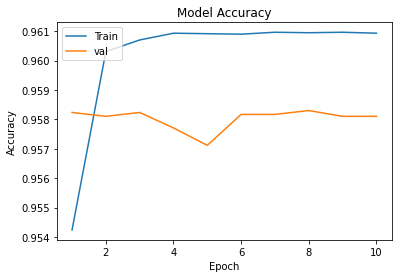

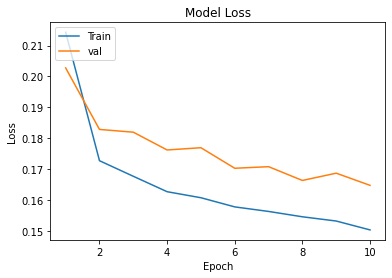

In [92]:
learning_curve(trained_model, 10)